In [2]:
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader


from activation.acts import get_activations
from util.utils import vis_activations
from data.datasets import MNIST
from model.models import BasicMLP
from experiment import Trainer,ModelCard

In [3]:
acts = get_activations(return_type='dict')
acts

{'GELU': GELU(approximate='none'),
 'SoftModulusQ': SoftModulusQ(),
 'Modulus': Modulus(),
 'BipolarSigmoid': BipolarSigmoid(),
 'TanhExp': TanhExp(),
 'BipolarClippedUnit': BipolarClippedUnit()}

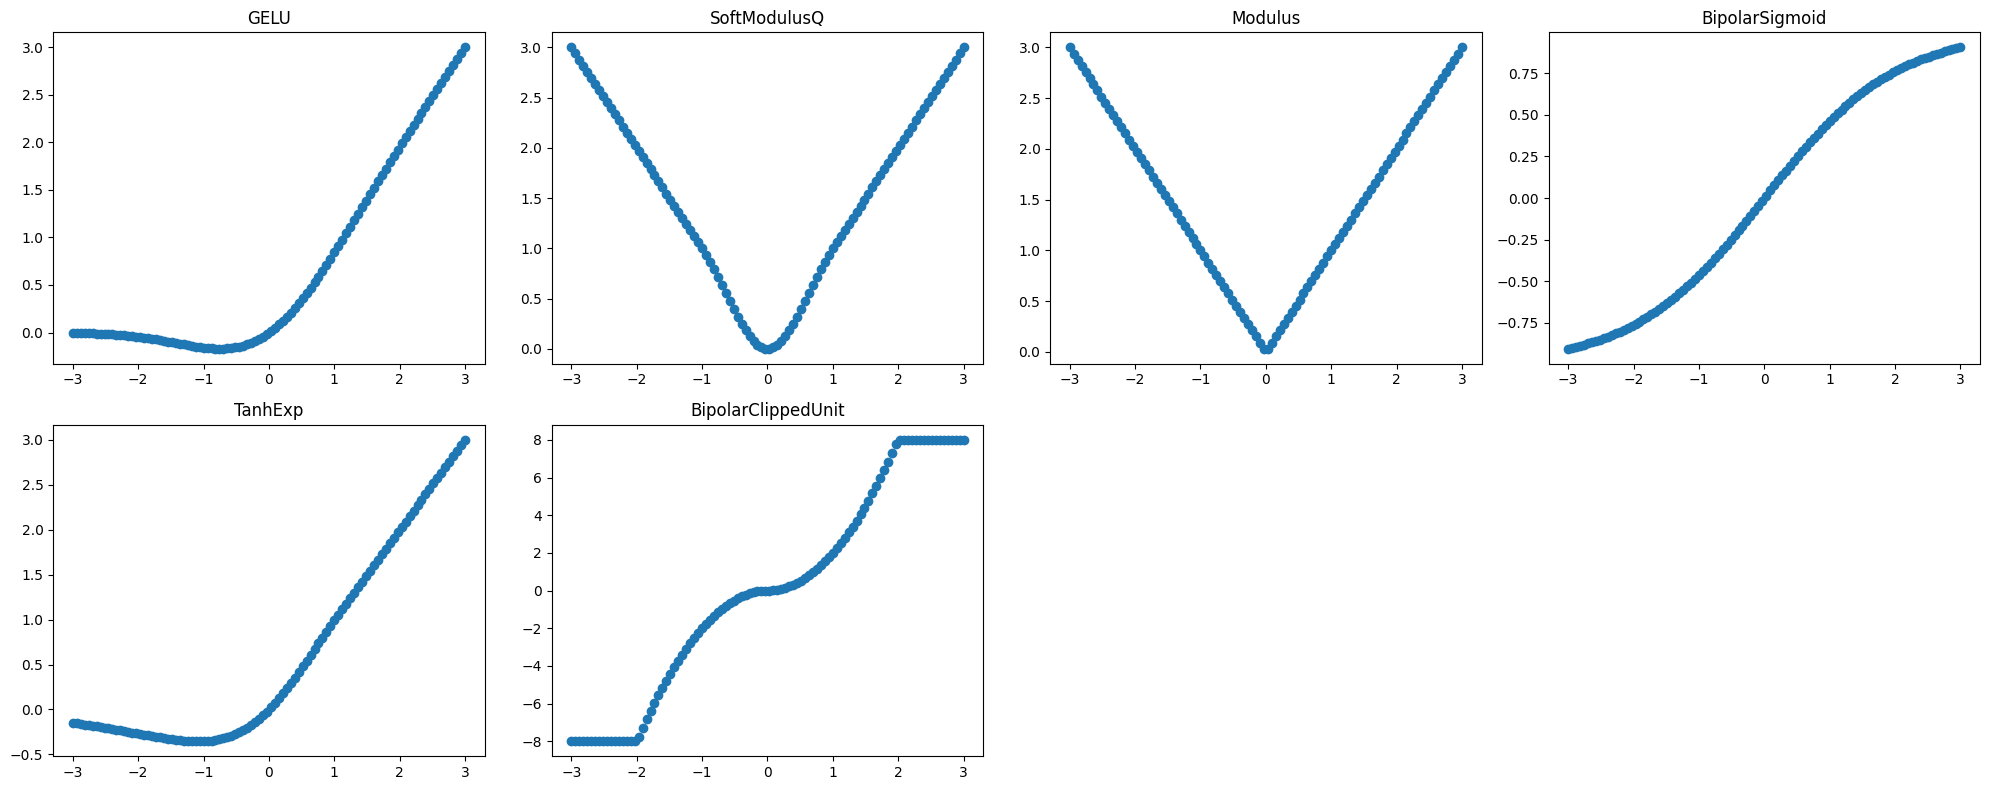

In [4]:
# visualize activation functions
x = torch.linspace(-3, 3, 100)

vis_activations(acts.values(), x, cols=4)

In [6]:
train_dataset = MNIST(train=True)
test_dataset = MNIST(train=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=2048, shuffle=False)

In [7]:
# model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

num_epochs = 1
learning_rate = 0.001
model_kwargs = {
    'input_size': 784,
    'hidden_size': 128,
    'num_classes': 10
}

model_card = ModelCard(BasicMLP,**model_kwargs)
trainer = Trainer(model_card=model_card,
                  data_loader=train_loader,
                  test_loader=test_loader,
                  criterion=nn.CrossEntropyLoss(),
                  optimizer=optim.AdamW,
                  optimizer_kwargs= {'lr':learning_rate},
                  device=device)


cuda


Training with GELU activation function...
Epoch [1/1], Test Loss: 0.5211, Test Accuracy: 84.81%
Training with SoftModulusQ activation function...
Epoch [1/1], Test Loss: 0.5619, Test Accuracy: 85.44%
Training with Modulus activation function...
Epoch [1/1], Test Loss: 0.5429, Test Accuracy: 85.14%
Training with BipolarSigmoid activation function...
Epoch [1/1], Test Loss: 1.1126, Test Accuracy: 75.28%
Training with TanhExp activation function...
Epoch [1/1], Test Loss: 0.5421, Test Accuracy: 85.03%
Training with BipolarClippedUnit activation function...
Epoch [1/1], Test Loss: 0.3678, Test Accuracy: 89.14%
True


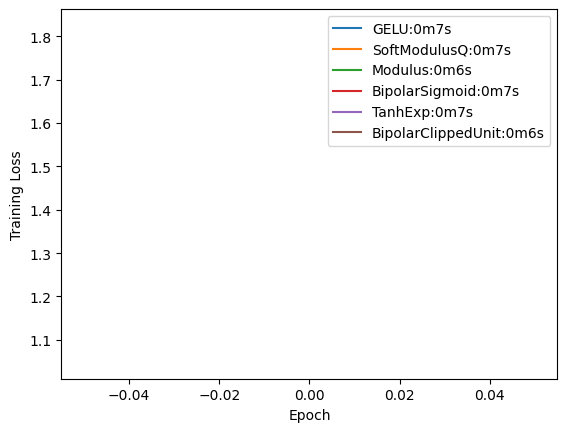

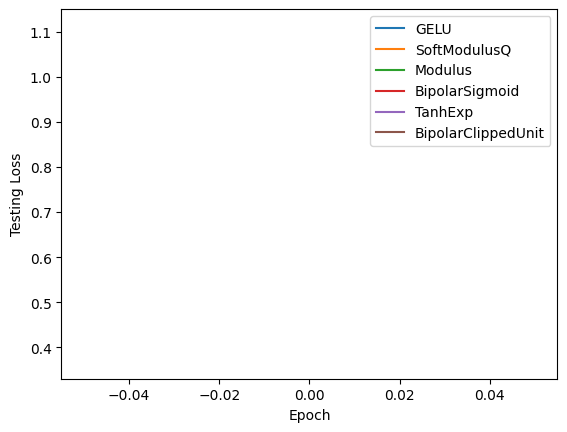

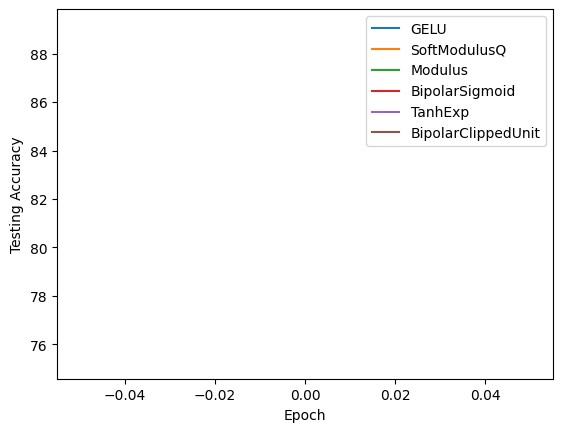

In [8]:
trainer.run_pipline(acts,num_epochs=num_epochs,experiments_dir='./results')